## 국민연금 연령별·성별·업종별 가입자 현황(총괄)

* http://kosis.kr/statHtml/statHtml.do?orgId=322&tblId=DT_32202_B012&conn_path=I2

### 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 폰트와 시각화 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트 설정
font_family = get_font_family()
sns.set(font=font_family, rc={"axes.unicode_minus": False})

### 데이터셋 불러오기

In [4]:
raw = pd.read_csv("nps.csv", encoding="cp949")
raw.shape

(34, 79)

In [5]:
# head 로 미리보기
raw.head()

,업종별(1),성별(1),2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,...,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10
0,업종별(1),성별(1),합계,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60세이상
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485


In [32]:
# info 로 요약하기
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 79 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   업종별(1)   34 non-null     object
 1   성별(1)    34 non-null     object
 2   2012     34 non-null     object
 3   2012.1   34 non-null     object
 4   2012.2   34 non-null     object
 5   2012.3   34 non-null     object
 6   2012.4   34 non-null     object
 7   2012.5   34 non-null     object
 8   2012.6   34 non-null     object
 9   2012.7   34 non-null     object
 10  2012.8   34 non-null     object
 11  2012.9   34 non-null     object
 12  2012.10  34 non-null     object
 13  2013     34 non-null     object
 14  2013.1   34 non-null     object
 15  2013.2   34 non-null     object
 16  2013.3   34 non-null     object
 17  2013.4   34 non-null     object
 18  2013.5   34 non-null     object
 19  2013.6   34 non-null     object
 20  2013.7   34 non-null     object
 21  2013.8   34 non-null     object
 22  2013

### 행에 있는 변수명을 컬럼으로 만들기

In [6]:
# iloc로 첫번째 행 가져오기
col_row_0 = raw.iloc[0]
col_row_0

업종별(1)     업종별(1)
성별(1)       성별(1)
2012           합계
2012.1     18~19세
2012.2     20~24세
            ...  
2018.6     40~44세
2018.7     45~49세
2018.8     50~54세
2018.9     55~59세
2018.10     60세이상
Name: 0, Length: 79, dtype: object

In [7]:
# col_row_0 의 index, values 를 딕셔너리로 묶기
cols = dict(zip(col_row_0.index, col_row_0.values))
cols

{'업종별(1)': '업종별(1)',
 '성별(1)': '성별(1)',
 '2012': '합계',
 '2012.1': '18~19세',
 '2012.2': '20~24세',
 '2012.3': '25~29세',
 '2012.4': '30~34세',
 '2012.5': '35~39세',
 '2012.6': '40~44세',
 '2012.7': '45~49세',
 '2012.8': '50~54세',
 '2012.9': '55~59세',
 '2012.10': '60세이상',
 '2013': '합계',
 '2013.1': '18~19세',
 '2013.2': '20~24세',
 '2013.3': '25~29세',
 '2013.4': '30~34세',
 '2013.5': '35~39세',
 '2013.6': '40~44세',
 '2013.7': '45~49세',
 '2013.8': '50~54세',
 '2013.9': '55~59세',
 '2013.10': '60세이상',
 '2014': '합계',
 '2014.1': '18~19세',
 '2014.2': '20~24세',
 '2014.3': '25~29세',
 '2014.4': '30~34세',
 '2014.5': '35~39세',
 '2014.6': '40~44세',
 '2014.7': '45~49세',
 '2014.8': '50~54세',
 '2014.9': '55~59세',
 '2014.10': '60세이상',
 '2015': '합계',
 '2015.1': '18~19세',
 '2015.2': '20~24세',
 '2015.3': '25~29세',
 '2015.4': '30~34세',
 '2015.5': '35~39세',
 '2015.6': '40~44세',
 '2015.7': '45~49세',
 '2015.8': '50~54세',
 '2015.9': '55~59세',
 '2015.10': '60세이상',
 '2016': '합계',
 '2016.1': '18~19세',
 '2016.2': '20~24세',
 '2

In [8]:
# 컬럼명과 첫번째 행의 값을 합쳐서 컬럼으로 만들 준비를 합니다.
# 반복문으로 순회하며 합쳐줍니다.
col_merge = []
for (key, val) in cols.items():
    col_merge.append(f"{key}, {val}")

In [9]:
# 값이 잘 합쳐졌는지 확인합니다.
col_merge[0]

'업종별(1), 업종별(1)'

In [10]:
col_merge[1]

'성별(1), 성별(1)'

In [11]:
col_merge[3]

'2012.1, 18~19세'

In [12]:
# 컬럼명을 위에서 만들어준 col_merge 변수의 값으로 변경합니다.
raw.columns = col_merge
raw.head()

,"업종별(1), 업종별(1)","성별(1), 성별(1)","2012, 합계","2012.1, 18~19세","2012.2, 20~24세","2012.3, 25~29세","2012.4, 30~34세","2012.5, 35~39세","2012.6, 40~44세","2012.7, 45~49세",...,"2018.1, 18~19세","2018.2, 20~24세","2018.3, 25~29세","2018.4, 30~34세","2018.5, 35~39세","2018.6, 40~44세","2018.7, 45~49세","2018.8, 50~54세","2018.9, 55~59세","2018.10, 60세이상"
0,업종별(1),성별(1),합계,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60세이상
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485


In [13]:
# raw에서 0번째 행은 필요 없으니 삭제합니다.
raw = raw.drop(0)

In [14]:
raw.head()

,"업종별(1), 업종별(1)","성별(1), 성별(1)","2012, 합계","2012.1, 18~19세","2012.2, 20~24세","2012.3, 25~29세","2012.4, 30~34세","2012.5, 35~39세","2012.6, 40~44세","2012.7, 45~49세",...,"2018.1, 18~19세","2018.2, 20~24세","2018.3, 25~29세","2018.4, 30~34세","2018.5, 35~39세","2018.6, 40~44세","2018.7, 45~49세","2018.8, 50~54세","2018.9, 55~59세","2018.10, 60세이상"
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485
5,농?임?수렵 및 어업,남자,42324,58,397,1599,2734,3553,5348,7346,...,94,1059,3029,3537,4860,4960,6890,9003,12138,1739


### melt로 Tidy data 만들기

<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png">

pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)
* [User guide and tutorial — seaborn 0.11.2 documentation](https://seaborn.pydata.org/tutorial.html)

In [15]:
# raw 의 일부를 미리보기 합니다.
raw

,"업종별(1), 업종별(1)","성별(1), 성별(1)","2012, 합계","2012.1, 18~19세","2012.2, 20~24세","2012.3, 25~29세","2012.4, 30~34세","2012.5, 35~39세","2012.6, 40~44세","2012.7, 45~49세",...,"2018.1, 18~19세","2018.2, 20~24세","2018.3, 25~29세","2018.4, 30~34세","2018.5, 35~39세","2018.6, 40~44세","2018.7, 45~49세","2018.8, 50~54세","2018.9, 55~59세","2018.10, 60세이상"
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485
5,농?임?수렵 및 어업,남자,42324,58,397,1599,2734,3553,5348,7346,...,94,1059,3029,3537,4860,4960,6890,9003,12138,1739
6,농?임?수렵 및 어업,여자,10767,31,321,753,827,934,1409,1835,...,33,426,928,1069,1441,1592,2367,3100,3887,746
7,광업,계,10653,32,87,545,953,1283,1752,2028,...,11,129,358,626,1004,1116,1615,1888,1852,-
8,광업,남자,9414,17,24,350,723,1129,1568,1886,...,10,83,237,452,803,979,1455,1767,1697,-
9,광업,여자,1239,15,63,195,230,154,184,142,...,1,46,121,174,201,137,160,121,155,-
10,제조업,계,3492376,36100,161530,455483,603394,527609,556370,494266,...,24629,189936,517902,589535,691177,602891,634666,546872,444542,8065


In [16]:
# raw 의 값을 melt 로 녹여서 df에 담습니다.
df = raw.melt(id_vars=["업종별(1), 업종별(1)", "성별(1), 성별(1)"])
df

,"업종별(1), 업종별(1)","성별(1), 성별(1)",variable,value
0,계,계,"2012, 합계",15663881
1,계,남자,"2012, 합계",9268035
2,계,여자,"2012, 합계",6395846
3,농?임?수렵 및 어업,계,"2012, 합계",53091
4,농?임?수렵 및 어업,남자,"2012, 합계",42324
...,...,...,...,...
2536,사회 및 개인서비스업,남자,"2018.10, 60세이상",17261
2537,사회 및 개인서비스업,여자,"2018.10, 60세이상",36436
2538,분류불능산업,계,"2018.10, 60세이상",303442
2539,분류불능산업,남자,"2018.10, 60세이상",97499


In [17]:
# 잘 녹여졌는지 확인합니다.
df.head()

,"업종별(1), 업종별(1)","성별(1), 성별(1)",variable,value
0,계,계,"2012, 합계",15663881
1,계,남자,"2012, 합계",9268035
2,계,여자,"2012, 합계",6395846
3,농?임?수렵 및 어업,계,"2012, 합계",53091
4,농?임?수렵 및 어업,남자,"2012, 합계",42324


### 컬럼명 변경하기
* 전처리 하기 편하게 직관적인 이름으로 변경합니다.

In [18]:
# rename 으로 변경하는 방법
df.rename(columns={"업종별(1), 업종별(1)" : "업종별", 
                   "성별(1), 성별(1)":"성별", "value":"가입자 수"}, inplace=True)

In [19]:
# df.columns 에 직접 변경할 컬럼을 지정해 주는 방법
# ["업종별", "성별", "variable", "가입자 수"]
df.columns = ["업종별", "성별", "variable", "가입자 수"]
df.head()

,업종별,성별,variable,가입자 수
0,계,계,"2012, 합계",15663881
1,계,남자,"2012, 합계",9268035
2,계,여자,"2012, 합계",6395846
3,농?임?수렵 및 어업,계,"2012, 합계",53091
4,농?임?수렵 및 어업,남자,"2012, 합계",42324


### 파생변수 만들기

In [20]:
# 파이썬 문자열
"2012, 합계".split(",")

['2012', ' 합계']

In [21]:
# variable 의 문자를 분리해서 "기간", "연령대" 컬럼 만들기
df["기간"] = df["variable"].str.split(",", expand=True)[0]
df["연령대"] = df["variable"].str.split(",", expand=True)[1]

In [22]:
# df.head() 로 전처리가 잘 되었는지 확인하기
df.head()

,업종별,성별,variable,가입자 수,기간,연령대
0,계,계,"2012, 합계",15663881,2012,합계
1,계,남자,"2012, 합계",9268035,2012,합계
2,계,여자,"2012, 합계",6395846,2012,합계
3,농?임?수렵 및 어업,계,"2012, 합계",53091,2012,합계
4,농?임?수렵 및 어업,남자,"2012, 합계",42324,2012,합계


In [23]:
# df.info() 로 전처리 내용 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   업종별       2541 non-null   object
 1   성별        2541 non-null   object
 2   variable  2541 non-null   object
 3   가입자 수     2541 non-null   object
 4   기간        2541 non-null   object
 5   연령대       2541 non-null   object
dtypes: object(6)
memory usage: 119.2+ KB


## 텍스트 데이터 전처리

In [24]:
# 기간에서 연도 추출하기
df["연도"] = df["기간"].str.split(".", expand=True)[0]

In [25]:
# 연령대구간 입니다.
df["연령대구간"] = df["기간"].str.split(".", expand=True)[1]

In [26]:
pd.Series([1, 2, 4, 5, np.nan])

0    1.0
1    2.0
2    4.0
3    5.0
4    NaN
dtype: float64

In [27]:
type(np.nan)

float

In [28]:
# 가입자 수의 "-" 텍스트를 replace를 사용하여 np.nan 으로 대체하기
# 가입자 수를 계산하기 위해 수치데이터로 만들기
df["가입자 수"] = df["가입자 수"].replace('-', np.nan)
df["가입자 수"] = df["가입자 수"].astype(float)

In [61]:
# 전처리 내용 확인
df.head()

,업종별,성별,variable,가입자 수,기간,연령대,연도,연령대구간
0,업종별(1),성별(1),"2012, 합계",합계,2012,합계,2012,None
1,계,계,"2012, 합계",15663881,2012,합계,2012,None
2,계,남자,"2012, 합계",9268035,2012,합계,2012,None
3,계,여자,"2012, 합계",6395846,2012,합계,2012,None
4,농?임?수렵 및 어업,계,"2012, 합계",53091,2012,합계,2012,None


In [29]:
# 전처리 내용을 확인하기 위해 describe 로 include="object" 를 사용하여 object 타입 데이터만 요약하기
df.describe(include="object")

,업종별,성별,variable,기간,연령대,연도,연령대구간
count,2541,2541,2541,2541,2541,2541,2310
unique,11,3,77,77,11,7,10
top,계,계,"2012, 합계",2012,합계,2012,1
freq,231,847,33,33,231,363,231


In [30]:
# 연령대구간의 유일값 보기
df["연령대구간"].unique()

array([None, '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
      dtype=object)

In [31]:
df["연령대구간"].value_counts()

1     231
2     231
3     231
4     231
5     231
6     231
7     231
8     231
9     231
10    231
Name: 연령대구간, dtype: int64

### 전처리 후 필요없는 컬럼 삭제

In [32]:
# variable 은 앞으로 사용하지 않을 것이기 때문에 drop 으로 삭제
# 삭제 후 셀을 다시 실행하면 이이 삭제한 컬럼이기 때문에 KeyError 가 납니다.
df = df.drop("variable", axis=1)

In [33]:
# 기간의 유일값을 출력해 어떤 값들이 있는지 봅니다.
df

,업종별,성별,가입자 수,기간,연령대,연도,연령대구간
0,계,계,15663881.0,2012,합계,2012,None
1,계,남자,9268035.0,2012,합계,2012,None
2,계,여자,6395846.0,2012,합계,2012,None
3,농?임?수렵 및 어업,계,53091.0,2012,합계,2012,None
4,농?임?수렵 및 어업,남자,42324.0,2012,합계,2012,None
...,...,...,...,...,...,...,...
2536,사회 및 개인서비스업,남자,17261.0,2018.10,60세이상,2018,10
2537,사회 및 개인서비스업,여자,36436.0,2018.10,60세이상,2018,10
2538,분류불능산업,계,303442.0,2018.10,60세이상,2018,10
2539,분류불능산업,남자,97499.0,2018.10,60세이상,2018,10


### 날짜 데이터 변환

In [67]:
# 연-월-일 형태로 변경해 주기 위해 문자 뒤에 ".1" 을 붙여줍니다.
# "2012.7" => "2012.7.1" 로 변경하면 문자열을 datetime 형태로 변환하여 다룰 수 있습니다.
# df["연도"]

## 연도별 전체 가입자 수

In [60]:
# 앞뒤 공백문자 제거
df["연령대"] = df["연령대"].str.strip()

In [78]:
# 업종, 성별, 연령대가 "계", "합계" 인 데이터는 이미 합계값이 있기 때문에 추출해서 사용해 봅니다.
# (df["업종별"] == "계") & (df["성별"] == "계") & (df["연령대"] == "합계") 
df_year = df[(df["업종별"] == "계") & (df["성별"] == "계") & (df["연령대"] == "합계")]

In [79]:
# df_year 에서 "연도", "가입자 수" 만 가져옵니다.
# "연도" 를 인덱스로 만들면 pandas 로 시각화가 쉬워집니다.
year_count = df_year[["연도", "가입자 수"]]
year_count = year_count.set_index("연도")
year_count

,가입자 수
연도,
2012,15663881.0
2013,16169339.0
2014,16554121.0
2015,17056789.0
2016,17659255.0
2017,17998055.0
2018,18612582.0


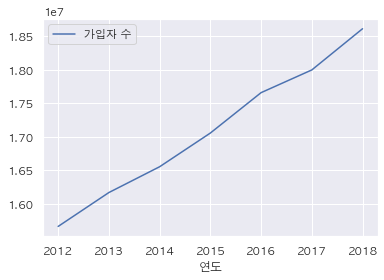

In [74]:
# 위에서 구한 연도별 데이터를 시각화 합니다.
year_count.plot()

In [75]:
df_year

,업종별,성별,가입자 수,기간,연령대,연도,연령대구간
0,계,계,15663881.0,2012,합계,2012,None
363,계,계,16169339.0,2013,합계,2013,None
726,계,계,16554121.0,2014,합계,2014,None
1089,계,계,17056789.0,2015,합계,2015,None
1452,계,계,17659255.0,2016,합계,2016,None
1815,계,계,17998055.0,2017,합계,2017,None
2178,계,계,18612582.0,2018,합계,2018,None


### 기간별 전체 가입자 수

In [96]:
# 항목별로 합계값은 제외하고 봅니다.
df_sub = df[(df["업종별"] != "계") & (df["성별"] != "계") & (df["연령대"] !="합계")]
df_sub.head() 

,업종별,성별,가입자 수,기간,연령대,연도,연령대구간
37,농?임?수렵 및 어업,남자,58.0,2012.1,18~19세,2012,1
38,농?임?수렵 및 어업,여자,31.0,2012.1,18~19세,2012,1
40,광업,남자,17.0,2012.1,18~19세,2012,1
41,광업,여자,15.0,2012.1,18~19세,2012,1
43,제조업,남자,18357.0,2012.1,18~19세,2012,1


[Cover Story 여론조사 바로 읽기… 신뢰수준 95 오차 ±31포인트 | 한경닷컴](https://www.hankyung.com/news/article/2015021392051)

Text(0.5, 1.0, '가입자 수 합계')

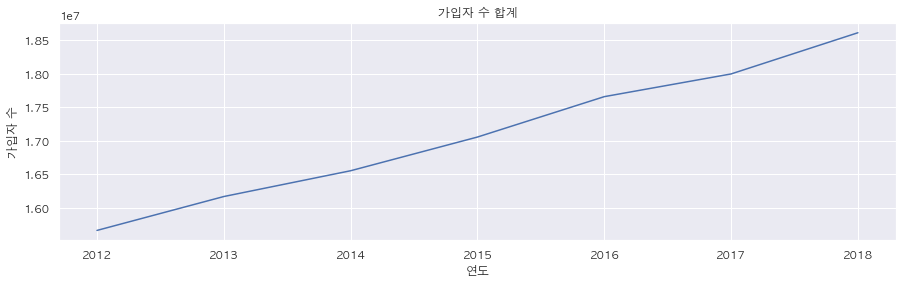

In [99]:
# lineplot 으로  x="연도", y="가입자 수" 를 시각화 합니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sub, x="연도", y="가입자 수", ci=None, estimator=np.sum).set_title("가입자 수 합계")

Text(0.5, 1.0, '성별 가입자 수 합계')

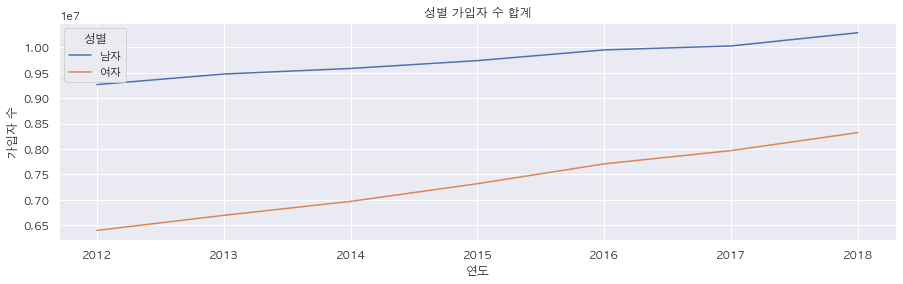

In [103]:
# lineplot 으로  x="연도", y="가입자 수", hue="성별" 를 시각화 합니다.
plt.figure(figsize=(15,4))

sns.lineplot(data=df_sub, x="연도", y="가입자 수", ci=None, hue="성별", estimator=np.sum).set_title("성별 가입자 수 합계")

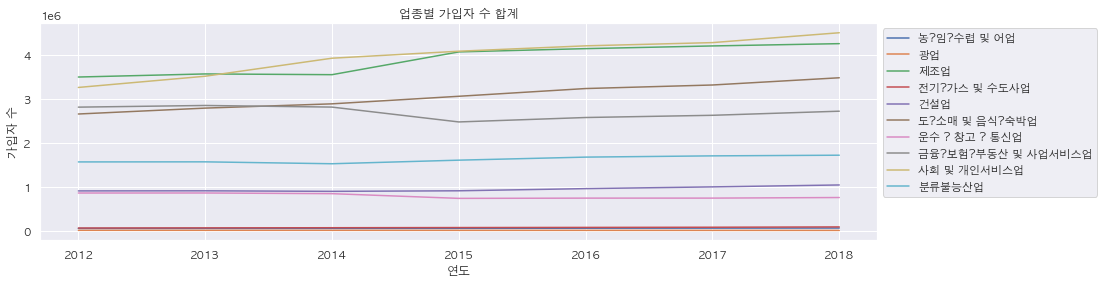

In [105]:
# lineplot 으로  x="연도", y="가입자 수", hue="업종별" 을 시각화 합니다.
plt.figure(figsize=(15,4))

sns.lineplot(data=df_sub, x="연도", y="가입자 수", ci=None, hue="업종별", estimator=np.sum).set_title("업종별 가입자 수 합계")
plt.legend(bbox_to_anchor=(1, 1))

## Small multiple 로 서브플롯 그리기

* [Small multiple - Wikipedia](https://en.wikipedia.org/wiki/Small_multiple)

In [111]:
df_sub.shape

(1400, 7)

<Figure size 1080x288 with 0 Axes>

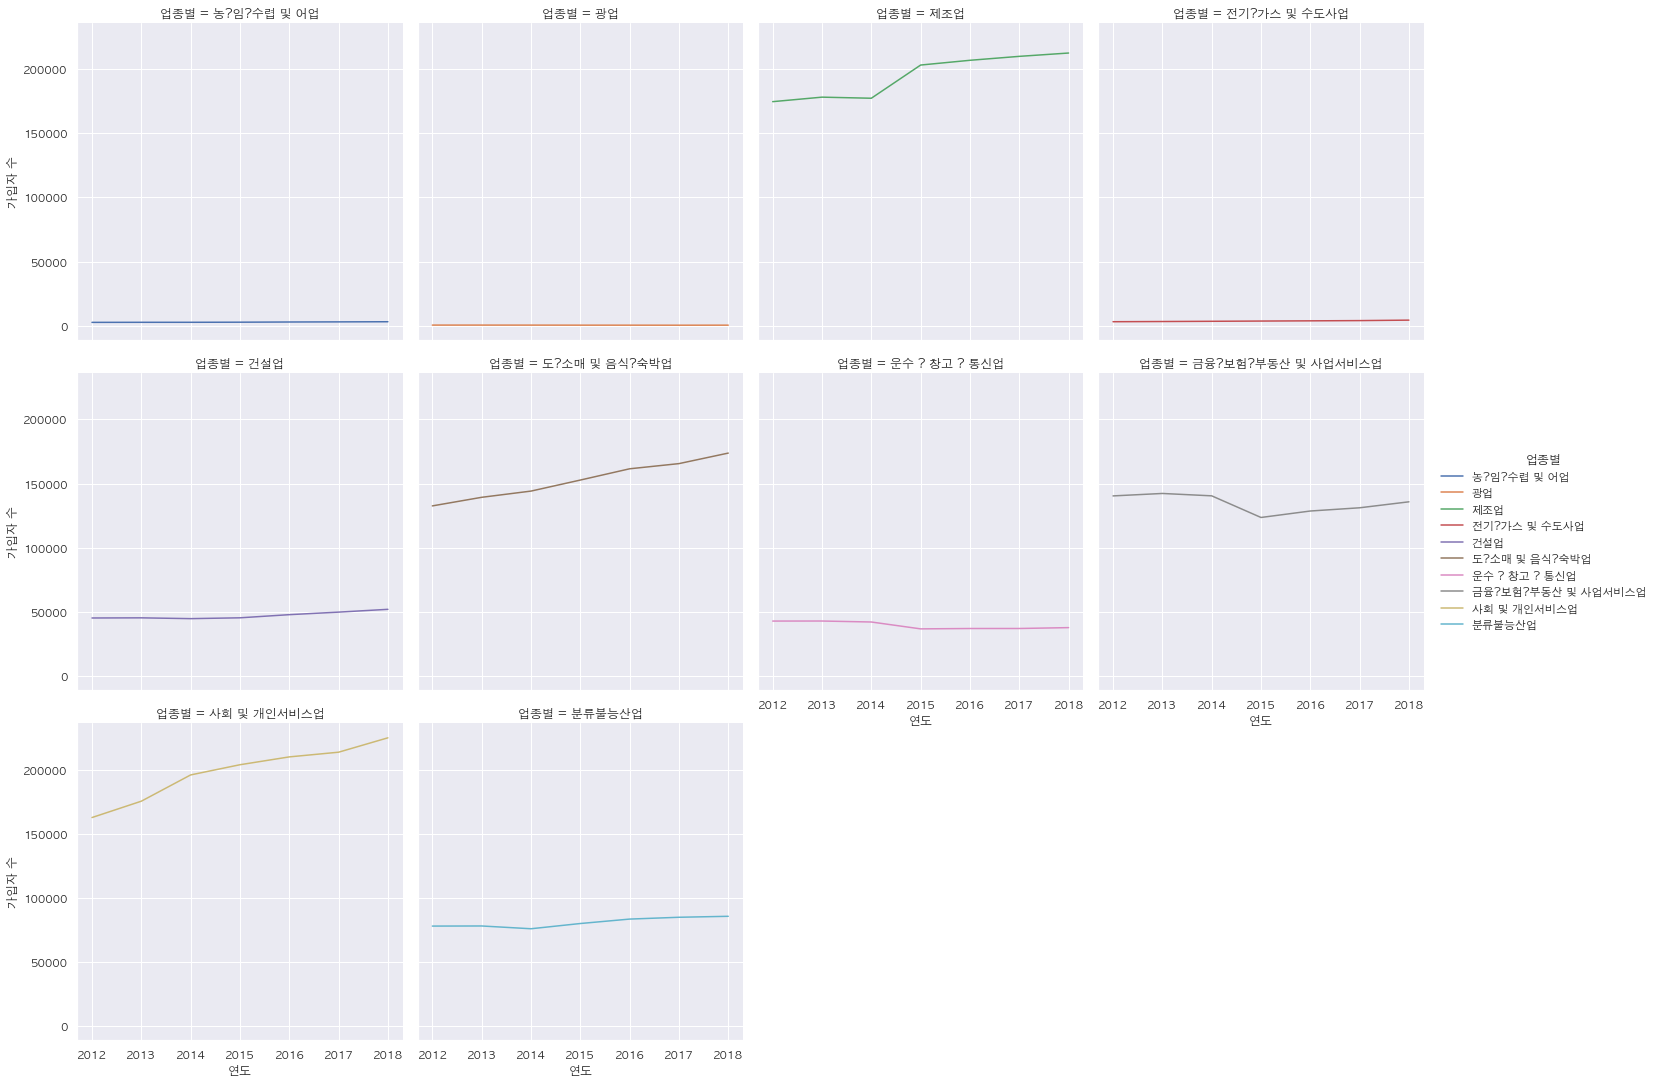

In [110]:
# relplot으로 x="연도", y="가입자 수", hue="성별", col="업종별", ci=None 을 시각화 합니다.
plt.figure(figsize=(15,4))
sns.relplot(data=df_sub, x="연도", y="가입자 수", kind="line",
            col="업종별", hue="업종별", ci=None, col_wrap=4)

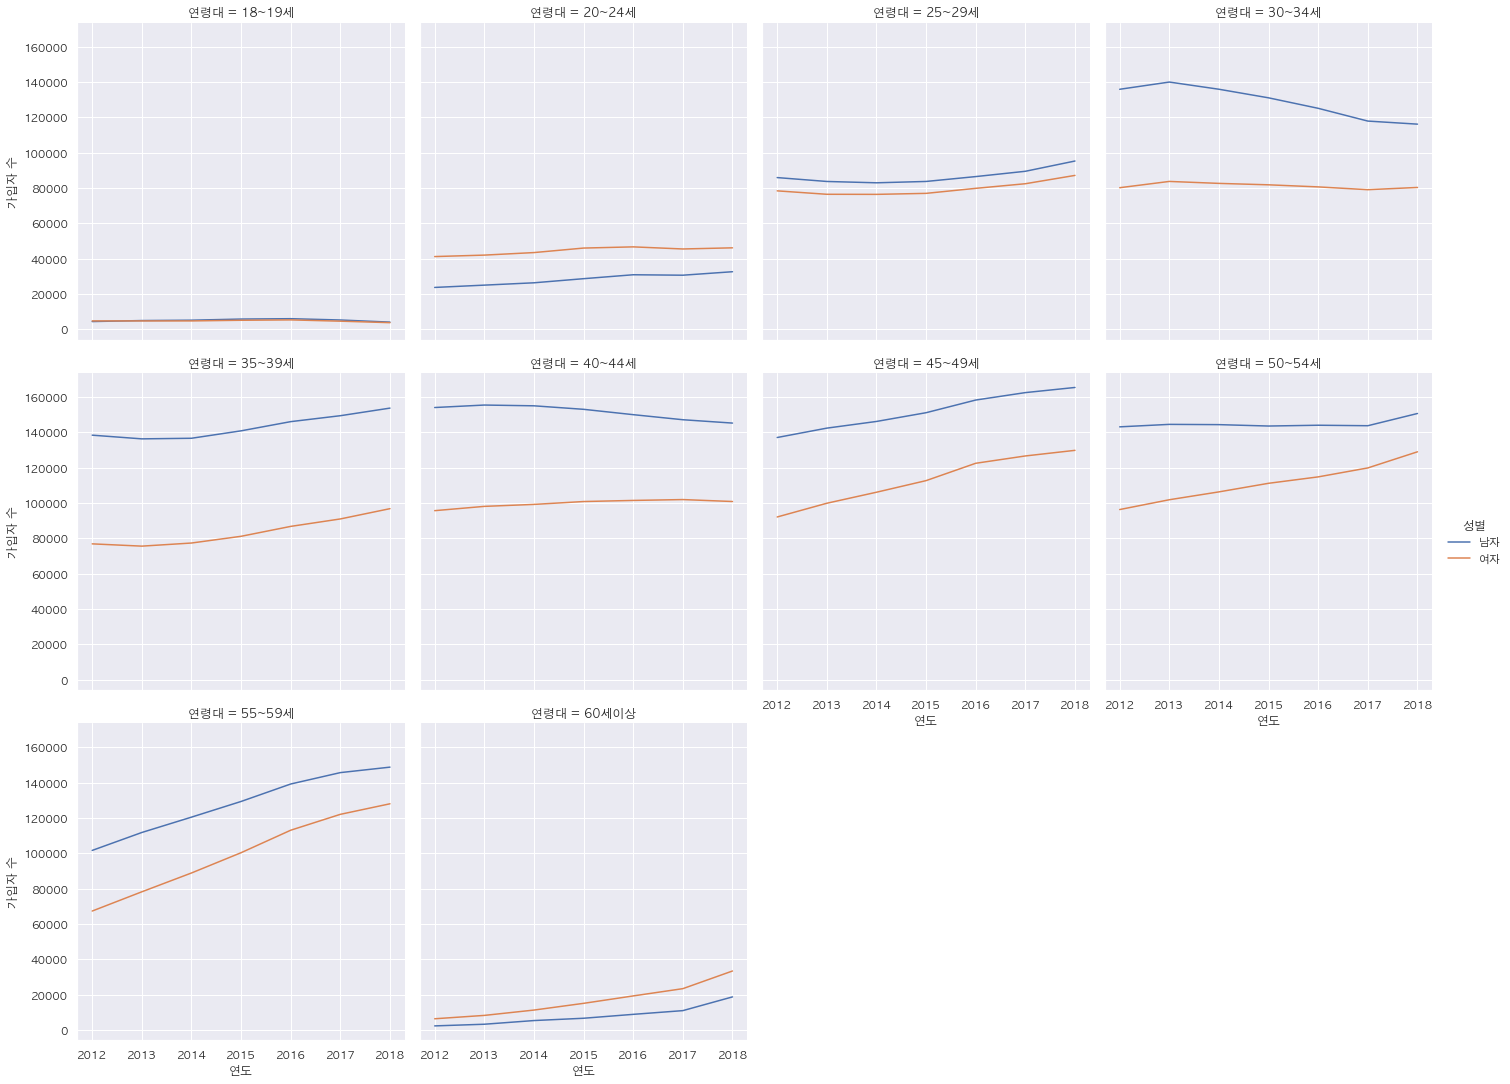

In [116]:
# x="연도", y="가입자 수", hue="성별", col="연령대" 로 relplot 시각화
sns.relplot(data=df_sub, x="연도", y="가입자 수", hue="성별", 
            kind="line", col="연령대", col_wrap=4, ci=None)

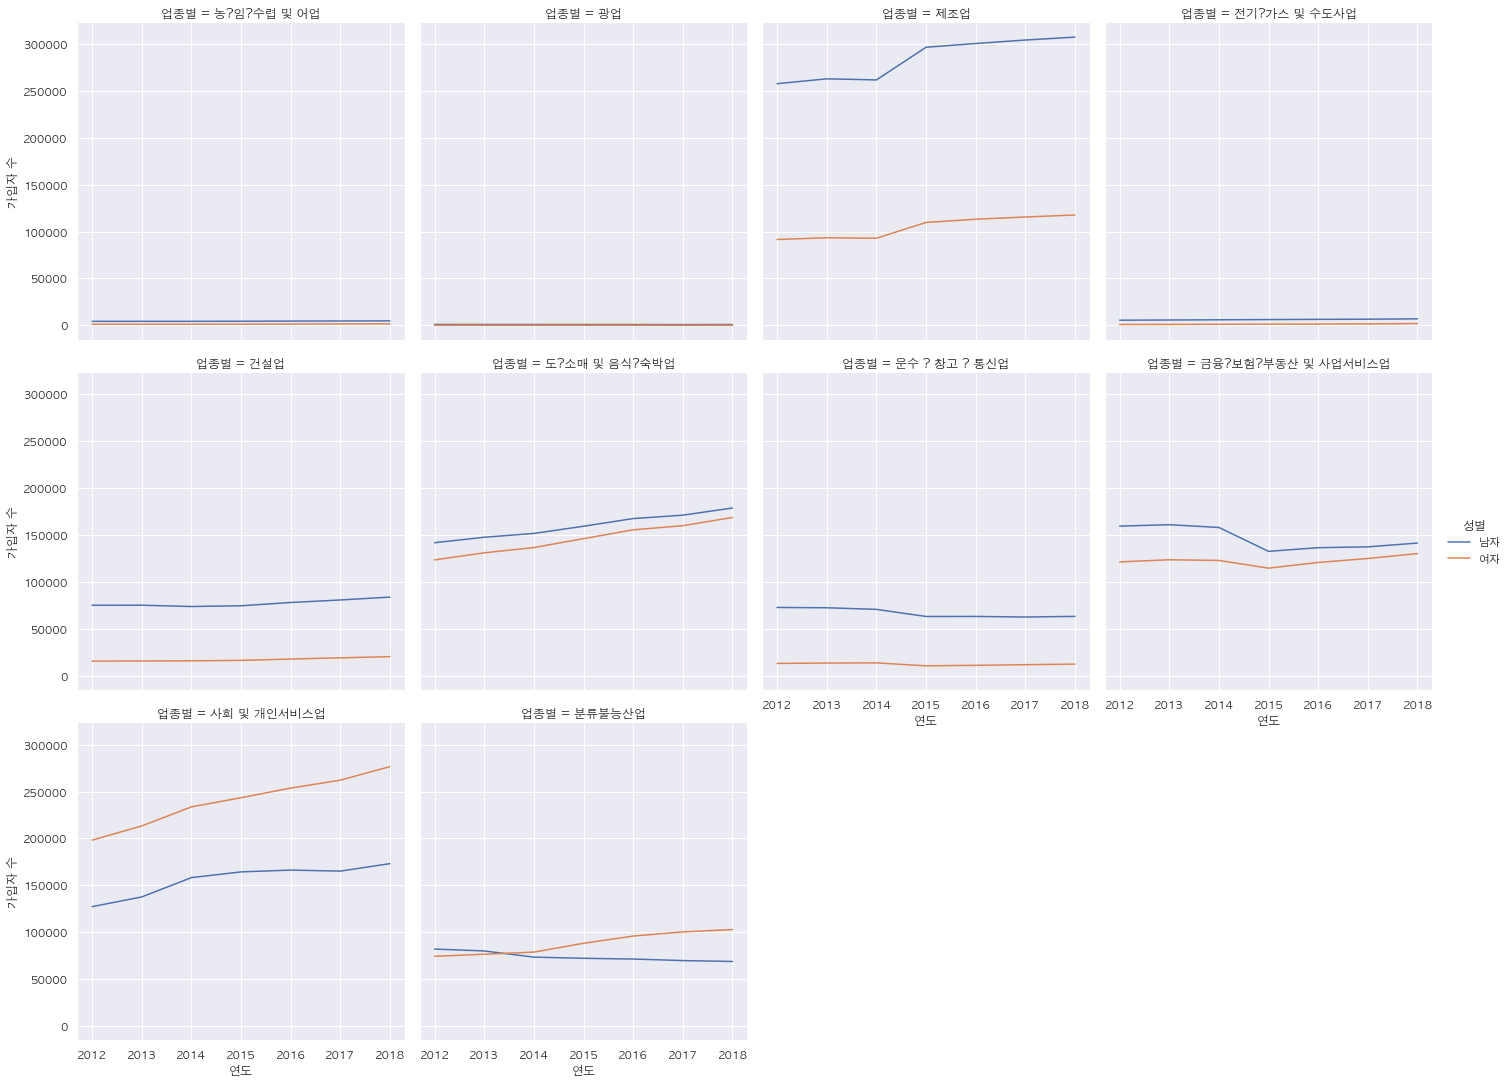

In [118]:
# x="연도", y="가입자 수", hue="성별", col="업종별" 로 relplot 시각화
sns.relplot(data=df_sub, x="연도", y="가입자 수", hue="성별", 
            kind="line", col="업종별", col_wrap=4, ci=None)

### groupby 로 연산하기

In [129]:
# df_year_month로 "연도", "업종별" 로 그룹화 하고 "가입자 수" 의 평균을 구해봅니다.
df_sub.groupby(by=["연도", "업종별"])["가입자 수"].mean().unstack()

업종별,건설업,광업,금융?보험?부동산 및 사업서비스업,농?임?수렵 및 어업,도?소매 및 음식?숙박업,분류불능산업,사회 및 개인서비스업,운수 ? 창고 ? 통신업,전기?가스 및 수도사업,제조업
연도,,,,,,,,,,
2012,45294.55,532.650000,140413.35,2654.55,132628.55,78211.50,162786.15,42895.25,3158.70,174618.80
2013,45408.65,529.900000,142317.65,2704.40,139315.95,78296.30,175519.45,42928.35,3317.45,178128.85
2014,44784.70,516.350000,140468.85,2714.35,144162.85,76137.20,195982.70,42166.05,3490.45,177282.55
2015,45430.55,481.900000,123607.65,2790.90,152756.15,80211.25,203924.10,36814.10,3676.80,203146.05
2016,47881.10,472.900000,128641.30,2940.15,161537.45,83668.00,210034.25,37096.30,3843.90,206847.40
2017,49862.90,445.400000,131155.25,3035.55,165566.40,85084.15,213691.40,37112.75,4033.70,209915.25
2018,52043.80,477.722222,135812.75,3144.90,173770.70,85837.95,224899.45,37784.55,4394.30,212510.75


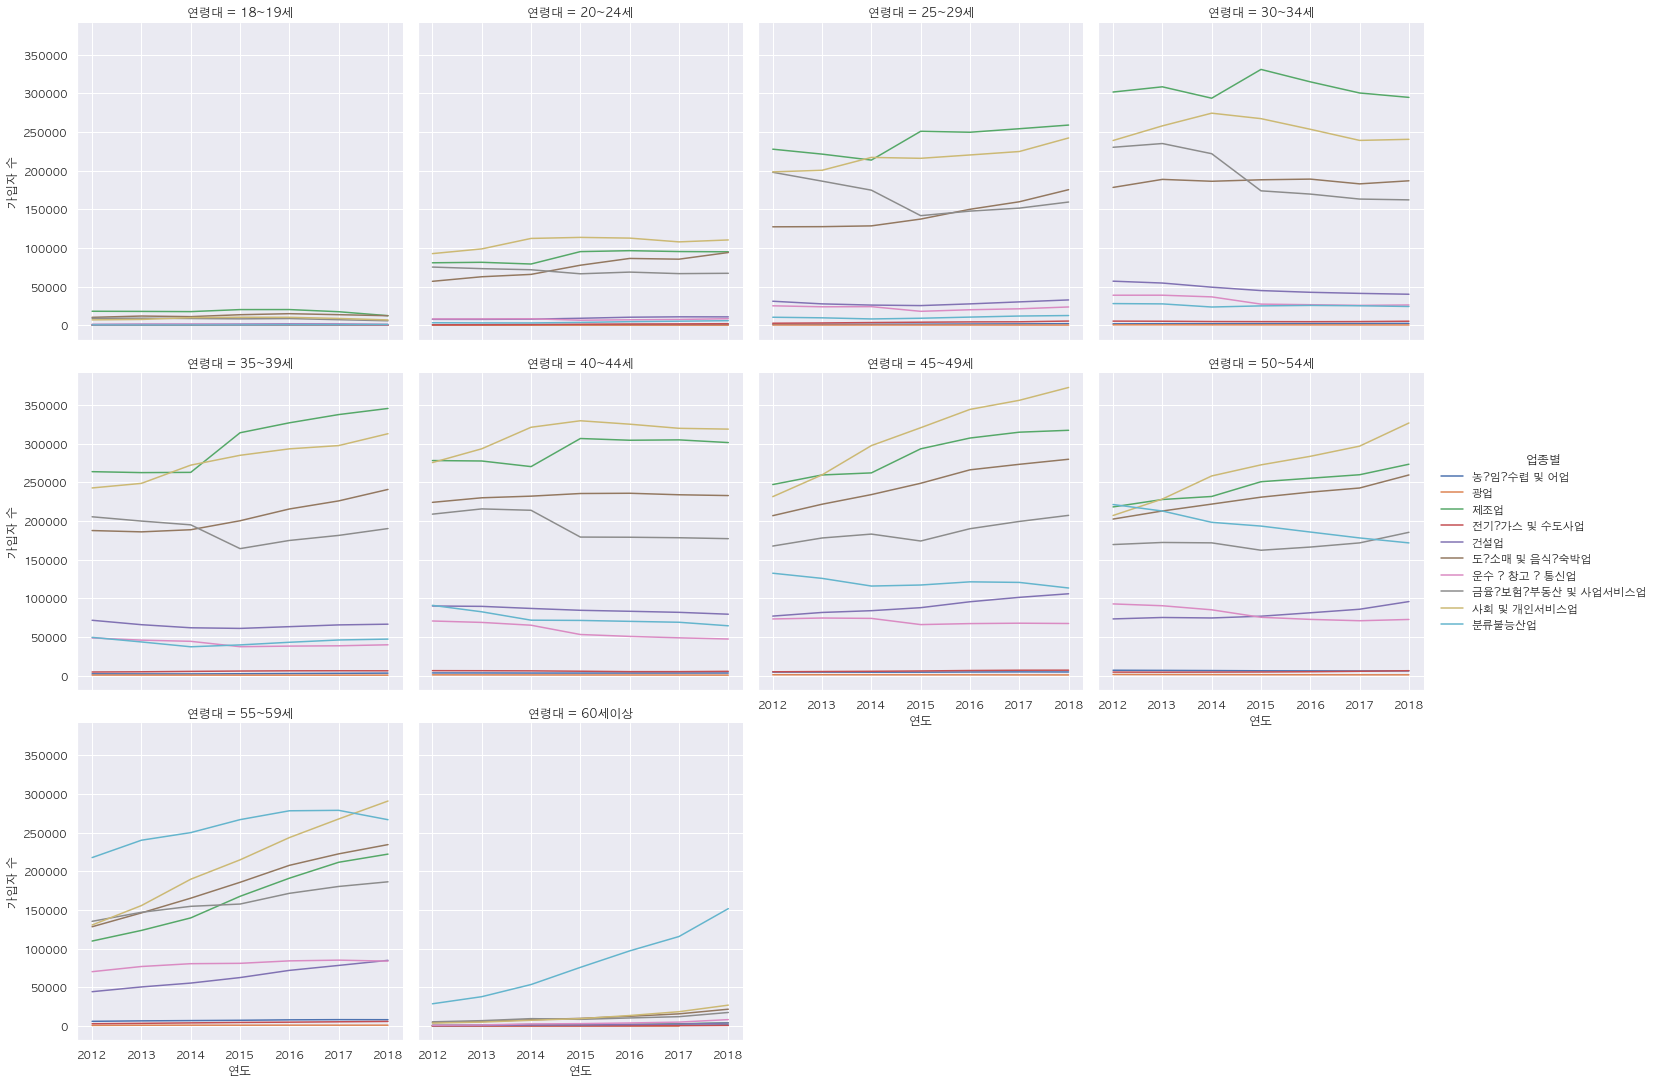

In [132]:
# relplot으로 x="연도", y="가입자 수", col="연령대", hue="업종별" 을 시각화 합니다.
sns.relplot(data=df_sub, x="연도", y="가입자 수", col="연령대", hue="업종별", 
            ci=None, col_wrap=4, kind="line")

### "사회 및 개인서비스업" 업종만 보기

In [136]:
# df_service 에 "업종별"이 "사회 및 개인서비스업"만 가져옵니다.
df_service = df[df["업종별"] == "사회 및 개인서비스업"]

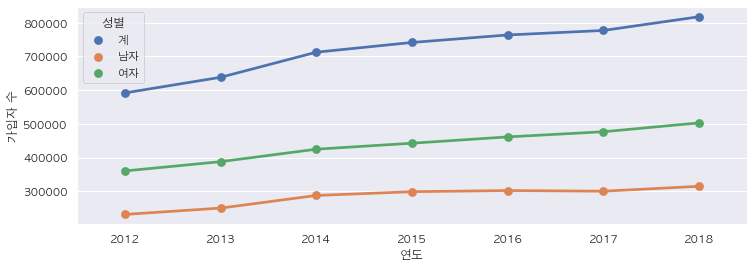

In [138]:
# pointplot 으로 df_service에 담긴 x="연도", y="가입자 수", hue="월"을 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(data=df_service,  x="연도", y="가입자 수", hue="성별", ci=None)

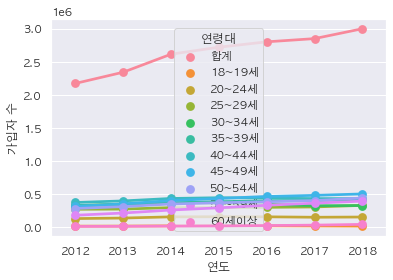

In [139]:
# relplot으로 x="시기", y="가입자 수", col="연령대", hue="성별" 을 시각화 합니다.

sns.pointplot(data=df_service,  x="연도", y="가입자 수", hue="연령대", ci=None)

### 다양한 업종을 직접 분석해 보세요

In [141]:
df_sub["업종별"].unique()

array(['농?임?수렵 및 어업', '광업', '제조업', '전기?가스 및 수도사업', '건설업', '도?소매 및 음식?숙박업',
       '운수 ? 창고 ? 통신업', '금융?보험?부동산 및 사업서비스업', '사회 및 개인서비스업', '분류불능산업'],
      dtype=object)

In [ ]:
df_finace = df_year_month[df_year_month["업종별"] == "금융?보험?부동산 및 사업서비스업"]
df_finace

In [ ]:
# 특정 업종의 relplot 을 x="시기", y="가입자 수", col="연령대", hue="성별", kind="line" 로 시각화 합니다.
